# Jonathan Halverson
# Tuesday, February 14, 2017
# Part 1: Overview of the figher table

In this notebook we inspect the figher data scraped from FightMetric.com.

Note that the fighter records include non-UFC fights. Some fighters have more losses than wins. Some fighters do not have all their professional MMA fights included in their records. We avoid detailed analysis of weight because fighters often change weight class and it is not known what their weight was for each fighter.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('fightmetric_fighters/fightmetric_fighters.csv', header=0, parse_dates=['Dob'])
df['Age'] = (pd.to_datetime('today') - df.Dob) / np.timedelta64(1, 'Y')
#pd.set_option('display.max_rows', 3000)
df.head(10)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
0,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,5.0,3.0,0.0,0,Tom Aaron,1978-07-13,38.601751
1,Danny,Abbadi,The Assassin,71.0,155.0,NaN,Orthodox,4.0,6.0,0.0,0,Danny Abbadi,1983-07-03,33.629712
2,David,Abbott,Tank,72.0,265.0,NaN,Switch,10.0,14.0,0.0,0,David Abbott,NaT,NaN
3,Shamil,Abdurakhimov,Abrek,75.0,235.0,76.0,Orthodox,16.0,4.0,0.0,0,Shamil Abdurakhimov,1981-09-02,35.461372
4,Hiroyuki,Abe,Abe Ani,66.0,145.0,NaN,Orthodox,8.0,14.0,3.0,0,Hiroyuki Abe,NaT,NaN
5,Papy,Abedi,Makambo,71.0,185.0,74.0,Southpaw,9.0,3.0,0.0,0,Papy Abedi,1978-06-30,38.637344
6,Ricardo,Abreu,Demente,71.0,185.0,73.0,Orthodox,5.0,3.0,0.0,0,Ricardo Abreu,1984-04-27,32.811078
7,Daniel,Acacio,NaN,68.0,180.0,NaN,Orthodox,26.0,12.0,0.0,0,Daniel Acacio,1977-12-27,39.143856
8,Scott,Adams,NaN,72.0,225.0,NaN,Southpaw,8.0,1.0,0.0,0,Scott Adams,NaT,NaN
9,Sam,Adkins,The Experience,75.0,225.0,NaN,Orthodox,7.0,20.0,2.0,0,Sam Adkins,1965-04-26,51.814890


### What are the data types and number of non-null values for each column?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
First       2832 non-null object
Last        2832 non-null object
Nickname    1447 non-null object
Height      2573 non-null float64
Weight      2757 non-null float64
Reach       1207 non-null float64
Stance      2021 non-null object
Win         2832 non-null float64
Loss        2832 non-null float64
Draw        2831 non-null float64
Belt        2832 non-null int64
Name        2832 non-null object
Dob         2106 non-null datetime64[ns]
Age         2106 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 309.8+ KB


### How many fighters are in the database?

In [4]:
df.shape[0]

2832

### What are the min and max values of the numerical columns?

In [5]:
df.describe().drop('Belt', axis=1).applymap(lambda x: round(x, 2))

,Height,Weight,Reach,Win,Loss,Draw,Age
count,2573.00,2757.00,1207.00,2832.00,2832.00,2831.00,2106.00
mean,70.50,176.14,71.88,11.38,5.25,0.31,35.36
std,3.36,40.42,4.02,9.16,4.82,0.90,6.38
min,60.00,105.00,60.00,0.00,0.00,0.00,20.83
25%,68.00,149.00,69.00,5.00,2.00,0.00,30.72
50%,71.00,170.00,72.00,10.00,4.00,0.00,34.58
75%,73.00,195.00,75.00,16.00,7.00,0.00,39.09
max,89.00,770.00,84.00,127.00,74.00,11.00,74.07


### What are the oldest and youngest birthdays?

In [6]:
min(df.Dob), max(df.Dob)

(Timestamp('1943-01-25 00:00:00'), Timestamp('1996-04-21 00:00:00'))

### What are the most common birthdays?

In [7]:
df[pd.notnull(df.Dob)].Dob.apply(lambda x: (x.month, x.day)).value_counts()[:5]

(7, 14)    17
(7, 16)    17
(8, 4)     16
(9, 22)    15
(8, 24)    12
Name: Dob, dtype: int64

### Any leap-year birthdays?

In [8]:
df[(df.Dob.dt.month == 2) & (df.Dob.dt.day == 29)]

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
487,Patrick,Cote,The Predator,71.0,170.0,71.0,Orthodox,24.0,10.0,0.0,0,Patrick Cote,1980-02-29,36.969958


### How many fighters were born in each month?

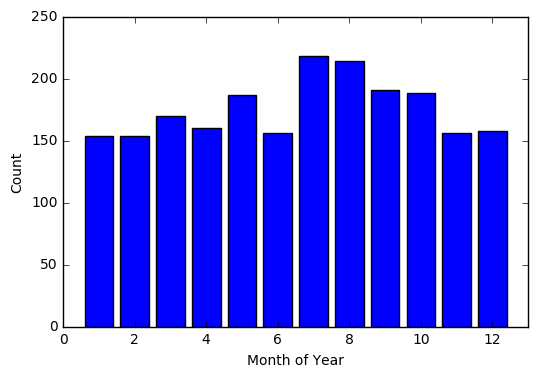

In [9]:
bd_counts = df[pd.notnull(df.Dob)].Dob.dt.month.value_counts()
plt.bar(bd_counts.index, bd_counts.values, align='center')
plt.xlim(0, 13)
plt.xlabel('Month of Year')
plt.ylabel('Count')

### Who are the 5 youngest fighters?

In [10]:
df[pd.notnull(df.Dob)].sort_values('Dob', ascending=False).head(5)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
2019,Claudio,Puelles,El Nino,71.0,155.0,72.0,Southpaw,8.0,2.0,0.0,0,Claudio Puelles,1996-04-21,20.827259
1825,Sage,Northcutt,Super,72.0,170.0,71.0,Orthodox,8.0,2.0,0.0,0,Sage Northcutt,1996-03-01,20.966892
1480,Veronica,Macedo,NaN,64.0,135.0,64.0,Southpaw,5.0,1.0,1.0,0,Veronica Macedo,1995-10-30,21.303654
2049,Ricardo,Ramos,NaN,69.0,135.0,72.0,Orthodox,10.0,1.0,0.0,0,Ricardo Ramos,1995-08-01,21.550066
1636,Alonzo,Menifield,NaN,73.0,205.0,NaN,NaN,1.0,0.0,0.0,0,Alonzo Menifield,1994-10-18,22.335845


### Do any fighters have the same name?

In [11]:
name_counts = df.Name.value_counts()
name_counts[name_counts > 1]

Tony Johnson        2
Michael McDonald    2
Dong Hyun Kim       2
Name: Name, dtype: int64

In [12]:
df[df.Name == 'Michael McDonald']

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
1588,Michael,McDonald,The Black Sniper,71.0,205.0,NaN,Orthodox,1.0,1.0,0.0,0,Michael McDonald,1965-02-06,52.031185
1590,Michael,McDonald,Mayday,69.0,135.0,70.0,Orthodox,17.0,4.0,0.0,0,Michael McDonald,1991-01-15,26.092254


There are three pairs of fighters with the same name.

### How does fighter height vary with weight?

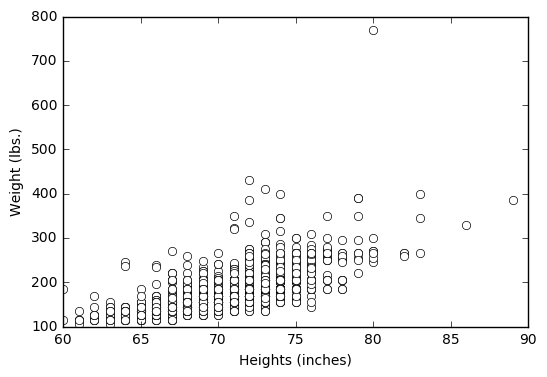

In [13]:
plt.plot(df.Height, df.Weight, 'wo')
plt.xlabel('Heights (inches)')
plt.ylabel('Weight (lbs.)')

### Who are the heaviest fighters?

In [14]:
df.dropna(subset=['Weight']).sort_values('Weight', ascending=False).head(5)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
2790,Emmanuel,Yarborough,NaN,80.0,770.0,NaN,Open Stance,1.0,2.0,0.0,0,Emmanuel Yarborough,1960-09-05,56.452905
2595,Teila,Tuli,NaN,72.0,430.0,NaN,Orthodox,0.0,1.0,0.0,0,Teila Tuli,1969-06-14,47.680651
2041,Thomas,Ramirez,NaN,73.0,410.0,NaN,Sideways,0.0,1.0,0.0,0,Thomas Ramirez,NaT,NaN
1568,John,Matua,NaN,74.0,400.0,NaN,Orthodox,1.0,4.0,0.0,0,John Matua,NaT,NaN
1972,Cory,Peterson,LA Giant,83.0,400.0,NaN,Orthodox,2.0,1.0,0.0,0,Cory Peterson,NaT,NaN


### Who are the tallest fighters?

In [15]:
df.dropna(subset=['Height']).sort_values('Height', ascending=False).head(5)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
2340,Paulo Cesar,Silva,Giant,89.0,385.0,NaN,Orthodox,2.0,6.0,0.0,0,Paulo Cesar Silva,1963-07-21,53.580840
414,Hong Man,Choi,Techno Goliath,86.0,330.0,NaN,Orthodox,2.0,3.0,0.0,0,Hong Man Choi,1980-10-30,36.301909
1972,Cory,Peterson,LA Giant,83.0,400.0,NaN,Orthodox,2.0,1.0,0.0,0,Cory Peterson,NaT,NaN
1203,Nathan,Jones,NaN,83.0,345.0,NaN,Orthodox,0.0,1.0,0.0,0,Nathan Jones,1970-08-21,46.495137
2469,Stefan,Struve,Skyscraper,83.0,265.0,84.0,Orthodox,32.0,8.0,0.0,0,Stefan Struve,1988-02-18,28.999911


### What is the distriubtion of fighter reach?

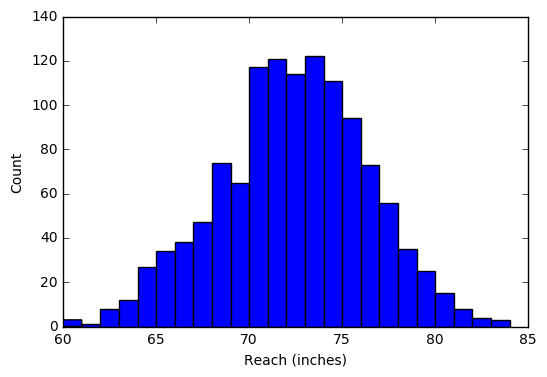

In [16]:
plt.hist(df.Reach.dropna(), bins=24)
plt.xlabel('Reach (inches)')
plt.ylabel('Count')

### Which fighters have the longest reach?

In [17]:
df[pd.notnull(df.Reach)].sort_values('Reach', ascending=False).head(5)

,First,Last,Nickname,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Name,Dob,Age
2469,Stefan,Struve,Skyscraper,83.0,265.0,84.0,Orthodox,32.0,8.0,0.0,0,Stefan Struve,1988-02-18,28.999911
1202,Jon,Jones,Bones,76.0,205.0,84.0,Orthodox,22.0,1.0,0.0,0,Jon Jones,1987-07-19,29.585823
1798,Francis,Ngannou,The Predator,76.0,250.0,83.0,Orthodox,10.0,1.0,0.0,0,Francis Ngannou,1986-09-05,30.453740
1190,Lavar,Johnson,Big,76.0,240.0,82.0,Orthodox,17.0,7.0,0.0,0,Lavar Johnson,1977-06-11,39.688700
555,Philip,De Fries,NaN,77.0,250.0,82.0,Orthodox,9.0,3.0,0.0,0,Philip De Fries,1986-04-21,30.828833


(55, 90)

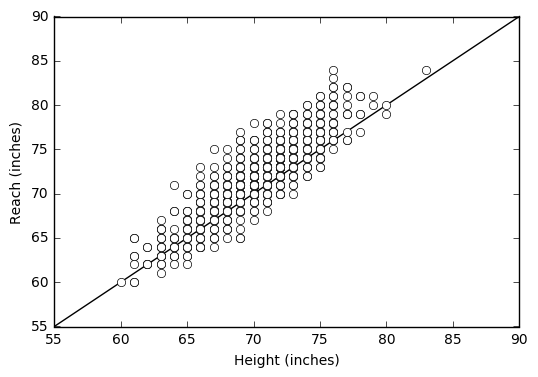

In [18]:
plt.plot([55, 90], [55, 90], 'k-')
plt.plot(df.Height, df.Reach, 'wo')
plt.xlabel('Height (inches)')
plt.ylabel('Reach (inches)')
plt.xlim(55, 90)
plt.ylim(55, 90)

### Which fighters have the largest reach-to-height ratio?

In [19]:
df['ReachHeight'] = df.Reach / df.Height
df.drop(['Nickname', 'Name'], axis=1).dropna(subset=['Reach', 'Height']).sort_values('ReachHeight', ascending=False).head(10)

,First,Last,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Dob,Age,ReachHeight
558,Rodrigo,de Lima,67.0,155.0,75.0,Orthodox,8.0,3.0,1.0,0,1991-03-12,25.938931,1.119403
1394,Kevin,Lee,69.0,155.0,77.0,Orthodox,14.0,2.0,0.0,0,1992-09-04,24.454985,1.115942
2395,Rameau Thierry,Sokoudjou,70.0,205.0,78.0,Orthodox,12.0,10.0,0.0,0,1984-04-18,32.835719,1.114286
262,Marcus,Brimage,64.0,135.0,71.0,Southpaw,7.0,5.0,0.0,0,1985-04-06,31.869238,1.109375
1358,Taylor,Lapilus,66.0,135.0,73.0,Southpaw,11.0,2.0,0.0,0,1992-04-08,24.862934,1.106061
1202,Jon,Jones,76.0,205.0,84.0,Orthodox,22.0,1.0,0.0,0,1987-07-19,29.585823,1.105263
217,Mark,Bocek,68.0,155.0,75.0,Orthodox,12.0,5.0,0.0,0,1981-10-24,35.319000,1.102941
528,Paul,Daley,69.0,170.0,76.0,Orthodox,31.0,11.0,2.0,0,1983-02-21,33.991115,1.101449
759,Caros,Fodor,69.0,155.0,76.0,Orthodox,7.0,3.0,0.0,0,1984-01-07,33.114985,1.101449
2570,Miguel,Torres,69.0,135.0,76.0,Orthodox,39.0,5.0,0.0,0,1981-01-18,36.082876,1.101449


### Which fighters have the smallest reach-to-height ratio?

In [20]:
df.drop(['Nickname', 'Name'], axis=1).dropna(subset=['Reach', 'Height']).sort_values('ReachHeight', ascending=True).head(10)

,First,Last,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Dob,Age,ReachHeight
1443,Artem,Lobov,69.0,145.0,65.0,Southpaw,14.0,12.0,1.0,0,1986-11-08,30.278514,0.942029
1494,Bernardo,Magalhaes,69.0,155.0,65.0,Orthodox,11.0,3.0,0.0,0,1981-04-08,35.863844,0.942029
807,Sheila,Gaff,65.0,135.0,62.0,Orthodox,10.0,6.0,1.0,0,1989-12-29,27.138134,0.953846
1214,Jocelyn,Jones-Lybarger,67.0,115.0,64.0,Orthodox,6.0,4.0,0.0,0,1985-10-04,31.373676,0.955224
824,Cody,Garbrandt,68.0,135.0,65.0,Orthodox,11.0,0.0,0.0,1,1991-07-07,25.618596,0.955882
2387,Leslie,Smith,69.0,135.0,66.0,Orthodox,9.0,7.0,1.0,0,1982-08-17,34.505842,0.956522
875,Frank,Gomez,70.0,135.0,67.0,Orthodox,10.0,4.0,0.0,0,1986-03-31,30.886329,0.957143
1475,Chris,Lytle,71.0,170.0,68.0,Orthodox,31.0,18.0,5.0,0,1974-08-18,42.503268,0.957746
1724,Peggy,Morgan,73.0,135.0,70.0,NaN,2.0,1.0,0.0,0,1979-12-16,37.175301,0.958904
637,Milana,Dudieva,63.0,135.0,61.0,Orthodox,11.0,5.0,0.0,0,1989-08-04,27.540607,0.968254


### Which fighters have the most fights?

In [21]:
df['Fights'] = df['Win'] + df['Loss'] + df['Draw']
df['WinRatio'] = df['Win'] / df['Fights']

In [22]:
df.sort_values('Fights', ascending=False).head(5).drop(['Nickname', 'Name'], axis=1)

,First,Last,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Dob,Age,ReachHeight,Fights,WinRatio
799,Travis,Fulton,72.0,240.0,NaN,Orthodox,127.0,49.0,10.0,0,1977-05-29,39.724293,NaN,186.0,0.682796
2307,Dan,Severn,74.0,250.0,NaN,Southpaw,100.0,18.0,7.0,0,1958-06-08,58.697988,NaN,125.0,0.800000
2104,Shannon,Ritch,69.0,190.0,NaN,Orthodox,47.0,74.0,0.0,0,1970-09-27,46.393834,NaN,121.0,0.388430
1089,Jeremy,Horn,73.0,185.0,74.0,Orthodox,88.0,21.0,5.0,0,1975-08-25,41.484767,1.013699,114.0,0.771930
2066,Dennis,Reed,NaN,205.0,NaN,Orthodox,43.0,52.0,1.0,0,NaT,NaN,NaN,96.0,0.447917


### Which fighters (with more than 15 fights) have the best win ratio?

In [23]:
df[df.Fights > 15].sort_values('WinRatio', ascending=False).head(5).drop(['Nickname', 'Name'], axis=1)

,First,Last,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Dob,Age,ReachHeight,Fights,WinRatio
1659,Phillip,Miller,71.0,185.0,NaN,Orthodox,16.0,0.0,0.0,0,1979-02-20,37.993936,NaN,16.0,1.000000
1833,Khabib,Nurmagomedov,70.0,155.0,70.0,Orthodox,24.0,0.0,0.0,0,1988-09-20,28.411261,1.000000,24.0,1.000000
1794,Julio Cesar,Neves Jr.,68.0,145.0,NaN,NaN,30.0,1.0,0.0,0,1994-04-25,22.817717,NaN,31.0,0.967742
2353,Douglas,Silva de Andrade,67.0,135.0,68.0,Orthodox,24.0,1.0,0.0,0,1985-06-22,31.658419,1.014925,25.0,0.960000
1202,Jon,Jones,76.0,205.0,84.0,Orthodox,22.0,1.0,0.0,0,1987-07-19,29.585823,1.105263,23.0,0.956522


### What is the distribtion of win ratios?

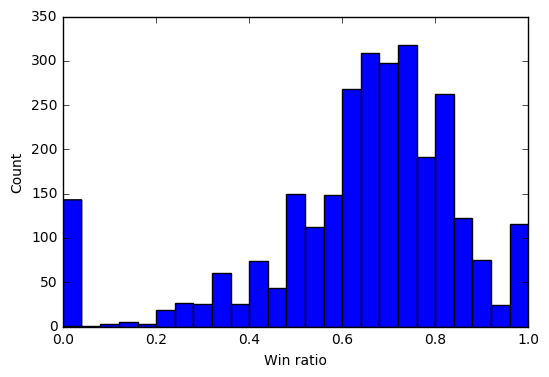

In [24]:
plt.hist(df.WinRatio.dropna(), bins=25)
plt.xlabel('Win ratio')
plt.ylabel('Count')

### Who are the champions?

In [25]:
df[df.Belt == 1].sort_values('Weight').drop(['Nickname', 'Name'], axis=1)

,First,Last,Height,Weight,Reach,Stance,Win,Loss,Draw,Belt,Dob,Age,ReachHeight,Fights,WinRatio
1169,Joanna,Jedrzejczyk,66.0,115.0,65.0,Orthodox,13.0,0.0,0.0,1,1987-08-18,29.503686,0.984848,13.0,1.000000
1191,Demetrious,Johnson,63.0,125.0,66.0,Orthodox,24.0,2.0,1.0,1,1986-08-13,30.516711,1.047619,27.0,0.888889
824,Cody,Garbrandt,68.0,135.0,65.0,Orthodox,11.0,0.0,0.0,1,1991-07-07,25.618596,0.955882,11.0,1.000000
1832,Amanda,Nunes,68.0,135.0,69.0,Orthodox,14.0,4.0,0.0,1,1988-05-30,28.720645,1.014706,18.0,0.777778
32,Jose,Aldo,67.0,145.0,70.0,Orthodox,26.0,2.0,0.0,1,1986-09-09,30.442788,1.044776,28.0,0.928571
562,Germaine,de Randamie,69.0,145.0,71.0,Orthodox,7.0,3.0,0.0,1,1984-04-24,32.819291,1.028986,10.0,0.700000
1069,Max,Holloway,71.0,145.0,69.0,Orthodox,17.0,3.0,0.0,1,1991-12-04,25.207910,0.971831,20.0,0.850000
1601,Conor,McGregor,69.0,170.0,74.0,Southpaw,21.0,3.0,0.0,1,1988-07-14,28.597439,1.072464,24.0,0.875000
2765,Tyron,Woodley,69.0,170.0,74.0,Orthodox,16.0,3.0,1.0,1,1982-04-07,34.867246,1.072464,20.0,0.800000
204,Michael,Bisping,73.0,185.0,75.0,Orthodox,31.0,7.0,0.0,1,1979-02-28,37.972032,1.027397,38.0,0.815789


### How does win ratio vary with reach-to-height ratio (for fighters with more than 10 fights)?

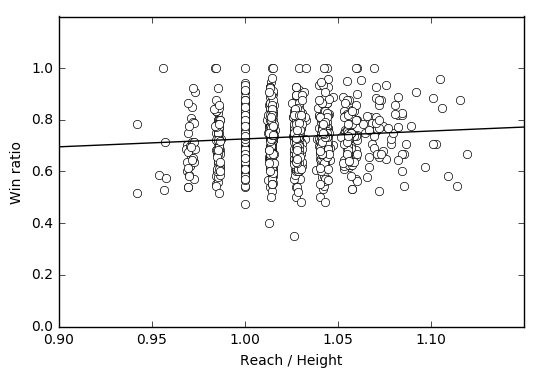

In [26]:
f10 = df[df.Fights > 10][['WinRatio', 'ReachHeight']].dropna()
m, b = np.polyfit(f10.ReachHeight.values, f10.WinRatio.values, 1)
plt.plot(f10.ReachHeight, f10.WinRatio, 'wo')
plt.plot(np.linspace(0.9, 1.15), m * np.linspace(0.9, 1.15) + b, 'k-')
plt.xlim(0.9, 1.15)
plt.ylim(0, 1.2)
plt.xlabel('Reach / Height')
plt.ylabel('Win ratio')

#### Statistical Test

In [27]:
from scipy.stats import pearsonr, spearmanr

corr_pearson, p_value_pearson = pearsonr(f10.ReachHeight, f10.WinRatio)
corr_spearman, p_value_spearman = spearmanr(f10.ReachHeight, f10.WinRatio)
print corr_pearson, p_value_pearson
print corr_spearman, p_value_spearman

0.0834931863553 0.00802894488485
0.0722699544644 0.0218185085266


We see that the correlation is small but statistically significant according to both measures.

### What are the different stances and how many fighters use them?

In [28]:
stance_overview = pd.DataFrame([df.Stance.value_counts(normalize=False), 100 * df.Stance.value_counts(normalize=True)]).T.applymap(lambda x: round(x, 2))
stance_overview.columns = ['Count', 'Percentage']
stance_overview.astype({'Count':int})

,Count,Percentage
Orthodox,1611,79.71
Southpaw,352,17.42
Switch,48,2.38
Open Stance,7,0.35
Sideways,3,0.15


### What are the average win ratio, height and reach for each stance?

In [29]:
df.groupby('Stance').agg({'WinRatio':[np.size, np.mean, np.std], 'Height':np.mean, 'Reach':np.mean})

Height      Reach WinRatio                    
                  mean       mean     size      mean       std
Stance                                                        
Open Stance  73.571429  74.500000      7.0  0.568526  0.159215
Orthodox     70.678436  71.998864   1611.0  0.653261  0.197109
Sideways     72.666667        NaN      3.0  0.388889  0.346944
Southpaw     70.381089  71.810680    352.0  0.668670  0.189263
Switch       71.104167  72.382353     48.0  0.703476  0.191147

### Is the win ratio of southpaws higher than that of orthodox (for fighters with more than 10 fights)?

In [30]:
f10_stance = df[df.Stance.isin(['Orthodox', 'Southpaw']) & (df.Fights > 10)]
stance = f10_stance.groupby('Stance').agg({'WinRatio':[np.mean, np.std], 'Height':[np.size, np.mean, np.std], 'Reach':[np.mean, np.std]})
stance.astype({('Height', 'size'):int}).applymap(lambda x: round(x, 2))

Height               Reach       WinRatio      
            size   mean   std   mean   std     mean   std
Stance                                                   
Orthodox  1203.0  70.60  3.27  72.07  3.94     0.69  0.13
Southpaw   277.0  70.24  2.99  71.84  3.54     0.70  0.13

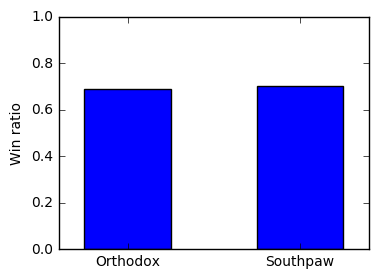

In [31]:
fig = plt.figure(1, figsize=(4, 3))
plt.bar(range(stance.shape[0]), stance[('WinRatio', 'mean')], width=0.5, tick_label=stance.index.values, align='center')
plt.ylim(0, 1)
plt.ylabel('Win ratio')

In [32]:
orthodox = f10_stance[(f10_stance.Stance == 'Orthodox')].WinRatio
southpaw = f10_stance[(f10_stance.Stance == 'Southpaw')].WinRatio

(0, 1.2)

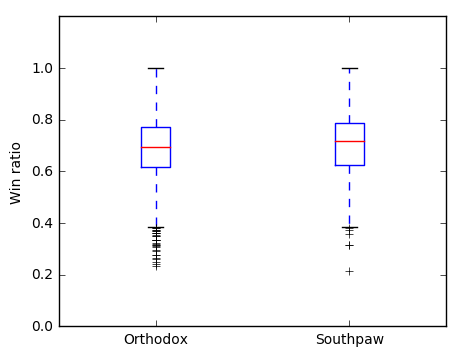

In [33]:
fig = plt.figure(1, figsize=(5, 4))
plt.boxplot([orthodox, southpaw], labels=['Orthodox', 'Southpaw'])
plt.ylabel('Win ratio')
plt.ylim(0, 1.2)

#### Statistical test

In [34]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(orthodox, southpaw, equal_var=False)
print t_stat, p_value

-1.61546596369 0.106981987847


The statistical test shows that the difference in win ratios between the two classes is not significant.